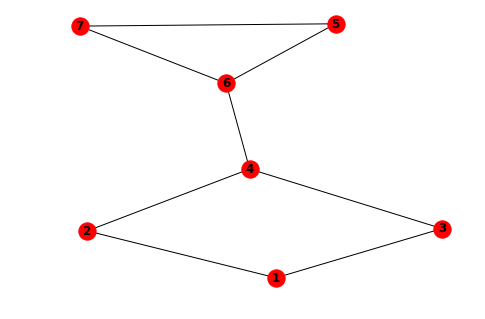

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import copy

G = nx.Graph()



nodes = [i for i in range(1, 8)]
edges = [(1, 2), (1, 3),(2, 4), (3, 4), (4, 6), (5, 6), (5, 7), (6, 7)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [27]:
def get_dt(G, source=1):
    i = 0
    dt = {}
    for start, end in list(nx.algorithms.edge_dfs(G, source=source)):
        if start not in dt:
            dt[start] = i
            i += 1
        if end not in dt:
            dt[end] = i
            i += 1
    return dt

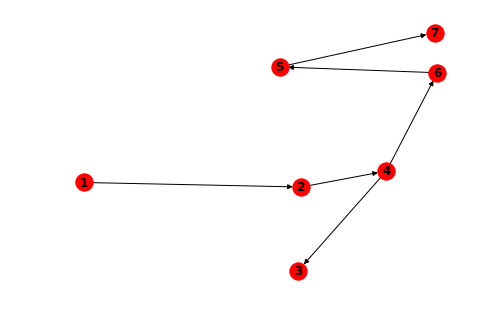

parent of 1 []
child of 1 [2]
parent of 2 [1]
child of 2 [4]
parent of 3 [4]
child of 3 []
parent of 4 [2]
child of 4 [3, 6]
parent of 5 [6]
child of 5 [7]
parent of 6 [4]
child of 6 [5]
parent of 7 [5]
child of 7 []


In [49]:
dt = get_dt(G, source=1)

valuations = {}
for i in range(1, 8):
    valuations[i] = {"valuation": i}
nx.set_node_attributes(G, valuations)

def argmax(d):
    """ a) create a list of the dict's keys and values; 
        b) return the key with the max value"""  
    v = list(d.values())
    k = list(d.keys())
    return k[v.index(max(v))]

def get_minus_di_and_Ti(i, G):
    G_without_i = copy.deepcopy(G)
    G_without_i.remove_node(i)
    left_nodes_after_removing_i = nx.dfs_tree(G_without_i, source=1).nodes
    minus_di = left_nodes_after_removing_i
    new_G = copy.deepcopy(G)
    new_G.remove_nodes_from(left_nodes_after_removing_i)
    Ti = nx.dfs_tree(new_G, source=i)
    return minus_di, Ti



def show_di_and_Ti(i, G):
    minus_di, Ti = get_minus_di_and_Ti(i, G)
    di = [i for i in G.nodes if i not in minus_di]
    print("di: ", di)
    print("minus_di: ", minus_di)
    nx.draw(Ti, with_labels=True, font_weight='bold')
    plt.show()

minus_d6, T6 = get_minus_di_and_Ti(6, G)



# def get_full_dfs_tree(G, source=1):
#     full_dfs_tree = nx.DiGraph()
#     full_dfs_tree.add_nodes_from(G.nodes)
#     dfs_edges = list(nx.algorithms.edge_dfs(G, source=source))
#     print(dfs_edges)
#     full_dfs_tree.add_edges_from(dfs_edges)
#     full_dfs_tree.source = source
#     print(full_dfs_tree.source)
#     return full_dfs_tree

dfs_tree = nx.dfs_tree(G, source=1)
nx.draw(dfs_tree, with_labels=True, font_weight='bold')
plt.show()

def get_parent(i, dfs_tree):
    return [edge[0] for edge in dfs_tree.in_edges(i)]

def get_child(i, dfs_tree):
    return [edge[1] for edge in dfs_tree.out_edges(i)]

def get_dtTi(dt, Ti):
    new_dt = dict((node, dt[node]) for node in Ti.nodes)
    return max(new_dt.values())

def get_eti(i):
    pass

def get_wi(i):
    pass

    
    
    


In [12]:
labels = nx.get_node_attributes(G, 'valuation')



